In [74]:
import pandas as pd
import numpy as np
import sys
import os
import matplotlib.pyplot as plt

In [75]:
sys.path.append(r"C:\Users\4019-tjyen\Desktop\plotlib\Visualization\yunchieh_plotlib")
print(sys.path)

['c:\\Users\\4019-tjyen\\Desktop', 'c:\\Users\\4019-tjyen\\anaconda\\python312.zip', 'c:\\Users\\4019-tjyen\\anaconda\\DLLs', 'c:\\Users\\4019-tjyen\\anaconda\\Lib', 'c:\\Users\\4019-tjyen\\anaconda', '', 'c:\\Users\\4019-tjyen\\anaconda\\Lib\\site-packages', 'c:\\Users\\4019-tjyen\\anaconda\\Lib\\site-packages\\win32', 'c:\\Users\\4019-tjyen\\anaconda\\Lib\\site-packages\\win32\\lib', 'c:\\Users\\4019-tjyen\\anaconda\\Lib\\site-packages\\Pythonwin', 'C:\\Users\\4019-tjyen\\Desktop\\plotlib\\Visualization\\yunchieh_plotlib', 'C:\\Users\\4019-tjyen\\Desktop\\plotlib\\Visualization\\yunchieh_plotlib', 'C:\\Users\\4019-tjyen\\Desktop\\plotlib\\Visualization\\yunchieh_plotlib']


In [76]:
# Import module 
from Plot_function import plot_error_bar

In [77]:
# Load file
data = pd.read_csv(r"C:\Users\4019-tjyen\Downloads\infer_results_02012024.csv", sep="\t")

In [78]:
# mean and std for each epoch
summary = data.groupby("epoch")["num_links"].agg(["mean", "std"]).reset_index()

In [36]:
# 1.96 * std
summary["1.96_std"] = 1.96 * summary["std"]

In [ ]:
data = data.merge(summary[["epoch", "mean", "1.96_std"]], on="epoch", how="left")

print(data)

In [ ]:
fig = plt.figure(figsize=(10, 6))
gs = fig.add_gridspec(2, 1, hspace=0.5, wspace=0.2)

In [ ]:
# First Plot
ax1 = fig.add_subplot(gs[0,0])

plot_error_bar(
    ax1, data, x_col="epoch", y_col="mean", error_col="1.96_std",
    set_xlabel="Epoch", set_ylabel= "Num Links",
    set_title="Plot 1: Error Bar for Num Links",
    tick_params={"direction": "in", "length": 6, "width" : 1}
)

plt.show()

In [86]:
# Layout settings
colors = ["#B78589", "#85B7B3"] 

In [105]:
# Legend settings
legend_labels = ["p-value <= 0.05", "p-value > 0.05"]

legend_loc = "center right"
bbox_to_anchor=(1.15, 0.5)
legend_fontsize = 12

legend_kwarg = dict(labelspacing=1.0,
                    handlelength=1.2,
                    handleheight=1.2,
                    handletextpad=1.5,
                    borderpad=1.0,
                    borderaxespad=0.0)


C:\Users\4019-tjyen\AppData\Local\Temp\ipykernel_13660\3423087998.py:35: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


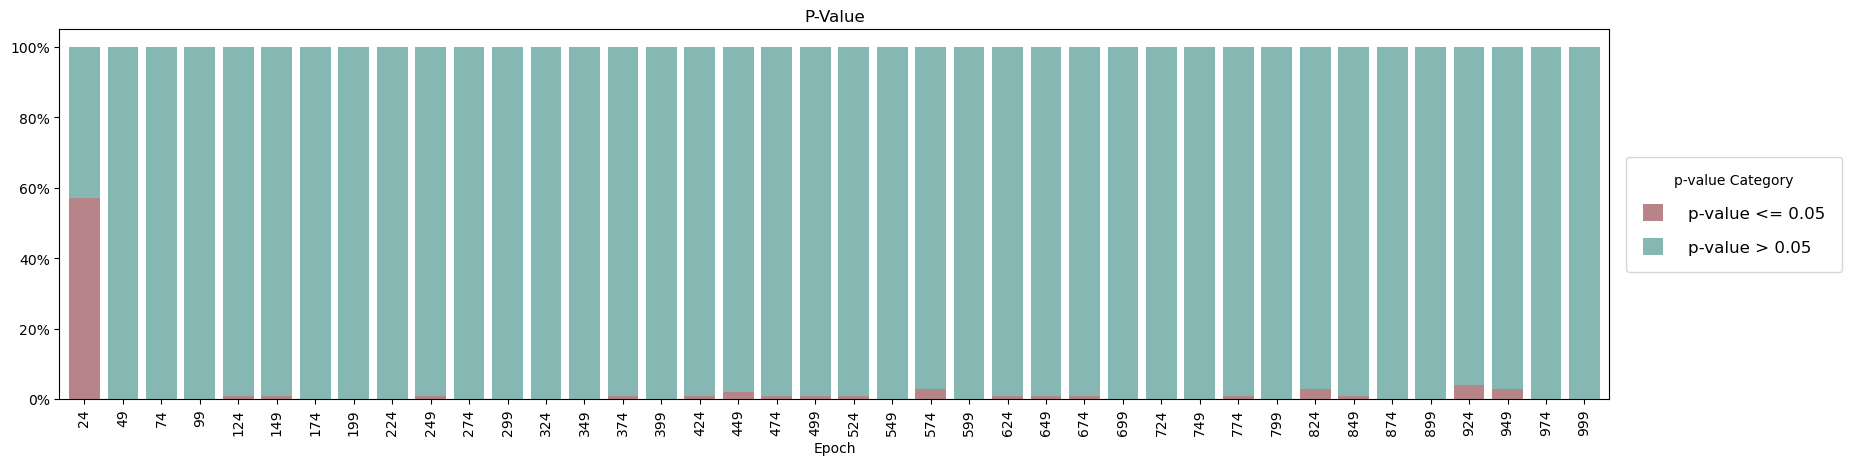

In [112]:
from matplotlib.ticker import FuncFormatter

# Second Plot

data["p_value_category"] = (data["ks_pvalue"] > 0.05).astype(int)

#print(data) 

epoch_grouped = data.groupby("epoch")["p_value_category"].value_counts(normalize=True).unstack(fill_value=0)

#print(epoch_grouped)

fig = plt.figure(figsize=(20, 12))
gs = fig.add_gridspec(2, 1, hspace=0.5, wspace=0.2)
ax2 = fig.add_subplot(gs[1,0])

epoch_grouped.plot(kind="bar", stacked=True, ax=ax2, color=colors, width=0.8)

ax2.yaxis.set_major_formatter(FuncFormatter(lambda y, _: f'{y * 100:.0f}%'))

ax2.set_xlabel("Epoch")
ax2.set_title("P-Value")


# Legend settings
ax2.legend(
    title="p-value Category",
    labels=legend_labels,
    loc=legend_loc,
    bbox_to_anchor=bbox_to_anchor,
    fontsize=legend_fontsize,
    **legend_kwarg
)
       
plt.tight_layout()